### Import Packages

In [26]:
# Ensure to install the following packages:
# pandas, geopandas, matplotlib

#Importing the required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import cKDTree

### Load Datasets

In [27]:
# Read the data from the CSV file
health_facilities_df = pd.read_csv('../hf_insights/Health_Facility Data - HFs_From_Ghana_HS_Website.csv')
gdf_health_facilities = gpd.GeoDataFrame(
    health_facilities_df, 
    geometry=gpd.points_from_xy(health_facilities_df.Longitude, health_facilities_df.Latitude),
    crs="EPSG:4326"
)


### Read in Admin Boundaries

In [28]:
# The path to shapefile
gdf_admin_boundaries = gpd.read_file('../hf_insights/geoBoundaries-GHA-ADM2.shp')

### Clean Data

In [29]:
print(gdf_health_facilities.isnull().sum())  # Check for missing values in health facility data
print('**************************')
print(gdf_admin_boundaries.isnull().sum())  # Check for missing values in administrative boundary data


Region             0
District           0
FacilityName       0
Type               0
Town             153
Ownership          0
Latitude          24
Longitude         24
Unnamed: 8      3731
geometry           0
dtype: int64
**************************
shapeName       0
shapeISO      260
shapeID         0
shapeGroup      0
shapeType       0
geometry        0
dtype: int64


In [30]:
# Drop the NaN values in the health facility data
gdf_health_facilities = gdf_health_facilities.dropna(subset=['Longitude', 'Latitude'])

### Check Projection

In [31]:
print(gdf_health_facilities.crs)
print(gdf_admin_boundaries.crs)


EPSG:4326
EPSG:4326


### Preliminary Visualization

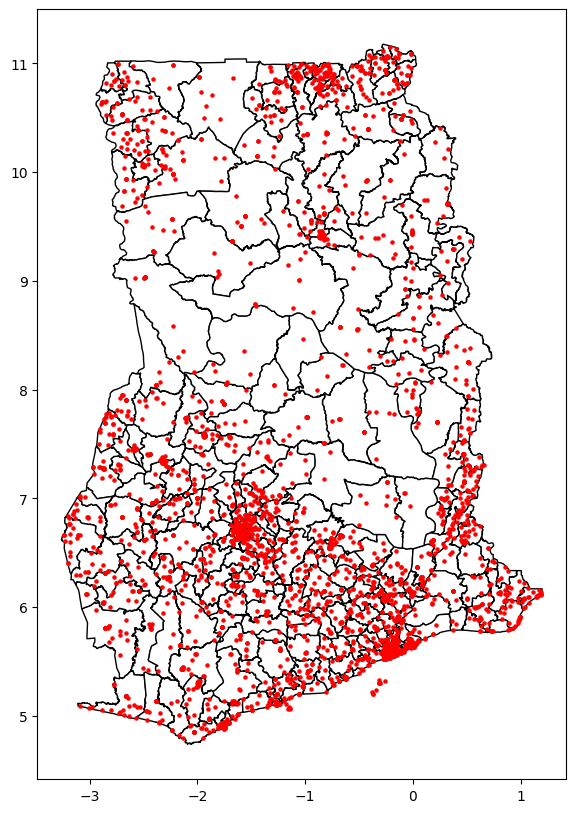

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_admin_boundaries.plot(ax=ax, color='white', edgecolor='black')
gdf_health_facilities.plot(ax=ax, markersize=5, color='red')
plt.show()


## Perform Analysis
### K-Means

In [33]:
# Extract Coordinates
coordinates = gdf_health_facilities[['Latitude', 'Longitude']].values

# Apply K-means Clustering
from sklearn.cluster import KMeans

# Number of clusters
k = 5  # Adjust based on your analysis and needs

# Run K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)

# Assign cluster labels to your original GeoDataFrame
gdf_health_facilities['cluster_label'] = kmeans.labels_

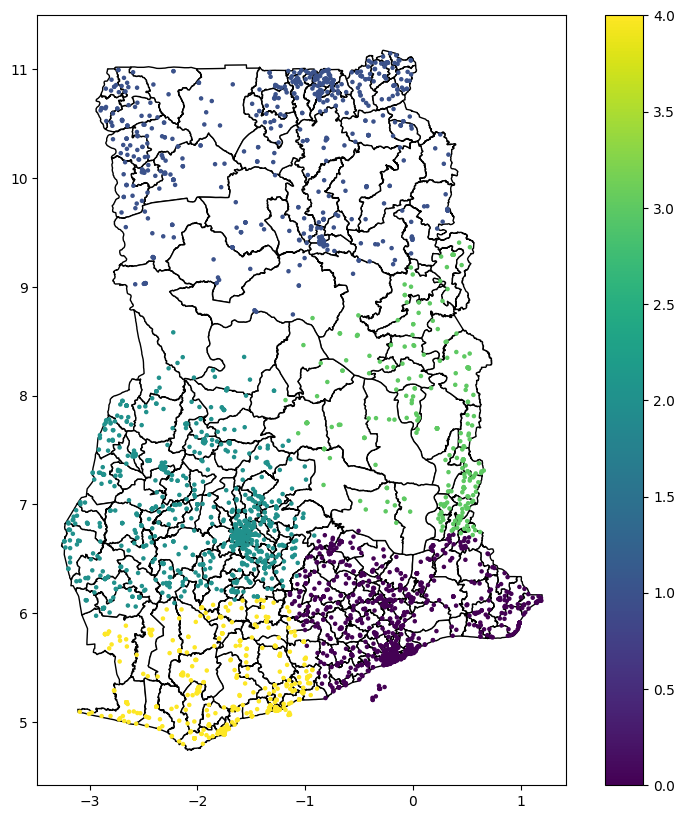

In [34]:
# Visible clusters
fig, ax = plt.subplots(figsize=(10, 10))
gdf_admin_boundaries.plot(ax=ax, color='white', edgecolor='black')
gdf_health_facilities.plot(column='cluster_label', ax=ax, markersize=5, cmap='viridis', legend=True)
plt.show()